In [2]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy.integrate import odeint

[2.78843510794429e-19, 2.1916994616190685e-29]
[2.78843510794429e-19, 2.1916994616190685e-29, 0.0]
[2.78843510794429e-19, 2.1916994616190685e-29, 0.0, 0.0]
[2.78843510794429e-19, 2.1916994616190685e-29, 0.0, 0.0, 0.0]
[2.78843510794429e-19, 2.1916994616190685e-29, 0.0, 0.0, 0.0, 0.0]
[2.78843510794429e-19, 2.1916994616190685e-29, 0.0, 0.0, 0.0, 0.0, 0.0]
[2.78843510794429e-19, 2.1916994616190685e-29, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[2.78843510794429e-19, 2.1916994616190685e-29, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[2.78843510794429e-19, 2.1916994616190685e-29, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[2.78843510794429e-19, 2.1916994616190685e-29, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[2.78843510794429e-19, 2.1916994616190685e-29, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[2.78843510794429e-19, 2.1916994616190685e-29, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[2.78843510794429e-19, 2.1916994616190685e-29, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

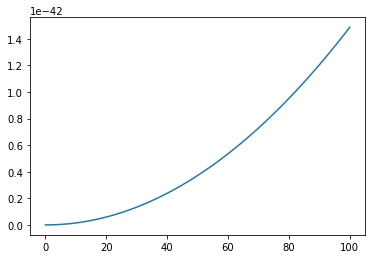

In [42]:
q=20#number of surface proteins
Ccmc=0.2*10**(-6) #critical concentration,mole
alpha=2 #line energy kT 
beta=70*10**(6) #rate of attachment, Hz/meter
c1t0=10.0*10**(-6) #initial concentration, mole
Rh=0.619*10**(-6) #hydrodynamic radius, meter, estimated for 300 amino acid protein
R=np.sqrt(q)*Rh/2 #estimate for spherical capsid radius
T=293 #room temp, K
k=1.38064852*10**(-23) #boltzmann constant
Z= 0.9544*10**(-3) #viscosity room temp water, pascals
D1=k*T/(6*np.pi*Rh*Z)#diffusion coefficient
j=D1*2*R/q

init= [0]*q #empty conditions
init[0]=c1t0#adding initial concentration of subunits

t=np.linspace(0,100,101)#time values

def Con(cn,t):#builds a q size list of dcdt
    
    dcdt=[0]#initializes dcdt
    #solves for initial rate of formation
    #dcdt[0]=beta*(-cn[0]+cn[1]*np.exp(alpha*(np.sqrt(2*q-4)+np.sqrt(q-1)))/(cn[0]*2/Ccmc))
    dcdt[0]=-(cn[0]**2)*j*np.sqrt(q-1)+j*np.sqrt(q-1)*Ccmc/2*np.exp(alpha*np.sqrt(2*q-4)+np.sqrt(q-1))
    i = 1 #dummy index
    while i < q-1:
        n=i+1
        if n == q-1:
            #dcdt.append(beta*cn[q-1]-beta*np.exp(np.sqrt(q-1)-1)*(cn[0]*2/Ccmc)**2)#ending rate adjustment
            dcdt.append(cn[0]*j*np.sqrt((q-1))*cn[q-1]-Ccmc/2*j*np.sqrt(q-1)*np.exp(alpha*np.sqrt(q-1)))#ending rate adjustment
        bn=cn[0]*j*np.sqrt(n*(q-n))#binding energy for capsid size n
        bnm1=cn[0]*j*np.sqrt((n-1)*(q-n+1))#binding energy for capsid size n+1
        #Gn=n*np.log(cn[0]*2/Ccmc)+alpha*np.sqrt(n*(q-n))#free energy for capsid size n
        #Gnp1=(n+1)*np.log(cn[0]*2/Ccmc)+alpha*np.sqrt((n+1)*(q-n-1))#free energy for capsid size n+1
        #Gnm1=(n-1)*np.log(cn[0]*2/Ccmc)+alpha*np.sqrt((n-1)*(q-n+1))#free energy for capsid size n-1
        alpn=(Ccmc/2)*j*np.sqrt((n-1)*(q-n+1))*np.exp(alpha*(np.sqrt(n*(q-n))-np.sqrt(n*(q-n))))#unbinding energy for capsid size n
        alpnp1=(Ccmc/2)*j*np.sqrt(n*(q-n))*np.exp(alpha*(np.sqrt(n+1)*(q-n-1))-np.sqrt(n*(q-n)))#unbinding energy for capsid size n+1
        dcdt.append(bnm1*cn[i-1]-alpn*cn[i]-bn*cn[i]+alpnp1*cn[i+1])#list of rates for all Cn at specific time
        i+=1
        print(dcdt)
    #v rate of complete capsid formation
    return(dcdt)


x=odeint(Con,init,t)#integrates rates to give txq matrix of concetrations of each size of capsid at each time step
Cq= x[:,q-1]#concentration of complete capsids as a function of time



plt.plot(t,Cq)